# BÁO CÁO ĐỀ TÀI CÁ NHÂN
## Môn học: Kho Dữ Liệu và Khai Phá Dữ Liệu

## PHẦN 1: GIỚI THIỆU VỀ CƠ SỞ DỮ LIỆU (CSDL)

### 1.1 Tổng quan về CSDL

In [1]:

import pandas as pd

# Đọc dữ liệu với đúng định dạng
df = pd.read_csv("/Users/baolamabcd/Workspace/project/jupyter/LMT/data/Renewable_Energy_Usage.csv", sep=";")  # Đảm bảo đổi đúng tên file

# Thông tin sơ bộ
print(df.shape)
df.head()


(1000, 12)


,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,False,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,False,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,True,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,False,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,False,65.98


### 1.2 Giới thiệu từng thuộc tính

In [2]:

# Phân tích từng thuộc tính
def analyze_attribute(df, column_name):
    print(f"\n--- {column_name} ---")
    print(f"Kiểu dữ liệu: {df[column_name].dtype}")
    print(f"Số giá trị null: {df[column_name].isnull().sum()}")
    print(f"Số giá trị unique: {df[column_name].nunique()}")
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        print(df[column_name].describe())
        print(f"Mode: {df[column_name].mode().values}")
    else:
        print(df[column_name].value_counts(normalize=True) * 100)
        print(f"Mode: {df[column_name].mode().values[0]}")

for col in df.columns:
    analyze_attribute(df, col)



--- Household_ID ---
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 1000
Household_ID
H01502    0.1
H00196    0.1
H01136    0.1
H01205    0.1
H01048    0.1
         ... 
H03826    0.1
H01198    0.1
H04254    0.1
H04059    0.1
H01927    0.1
Name: proportion, Length: 1000, dtype: float64
Mode: H00009

--- Region ---
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 6
Region
Europe           17.3
Australia        16.7
Africa           16.7
South America    16.6
North America    16.4
Asia             16.3
Name: proportion, dtype: float64
Mode: Europe

--- Country ---
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 25
Country
Australia       8.4
New Zealand     8.3
Canada          6.0
USA             5.6
Mexico          4.8
Spain           4.4
Japan           4.2
Ghana           4.2
Peru            3.8
South Africa    3.7
Italy           3.6
France          3.6
Egypt           3.6
Brazil          3.5
Colombia        3.4
Indonesia       3.3
Argentina       3.

### 1.3 Tiền xử lý dữ liệu

In [3]:

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Mã hóa và chuẩn hóa đơn giản
df['Income_Level'] = df['Income_Level'].map({'Low': 0, 'Middle': 1, 'High': 2})
df['Subsidy_Received'] = df['Subsidy_Received'].astype(int)

scaler = MinMaxScaler()
df[['Monthly_Usage_kWh', 'Cost_Savings_USD']] = scaler.fit_transform(df[['Monthly_Usage_kWh', 'Cost_Savings_USD']])


## PHẦN 2: PHÂN TÍCH VÀ THỐNG KÊ

### 2.1 Tìm hiểu dữ liệu

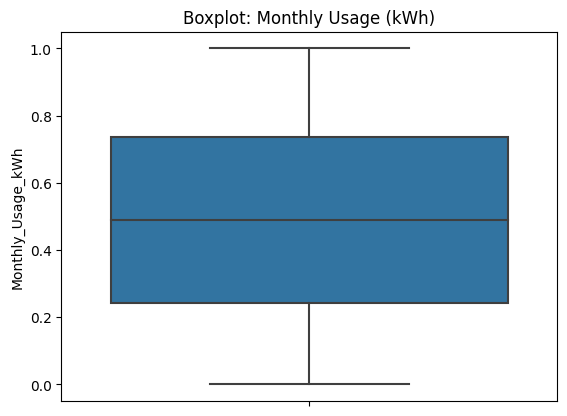

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df['Monthly_Usage_kWh'])
plt.title("Boxplot: Monthly Usage (kWh)")
plt.show()


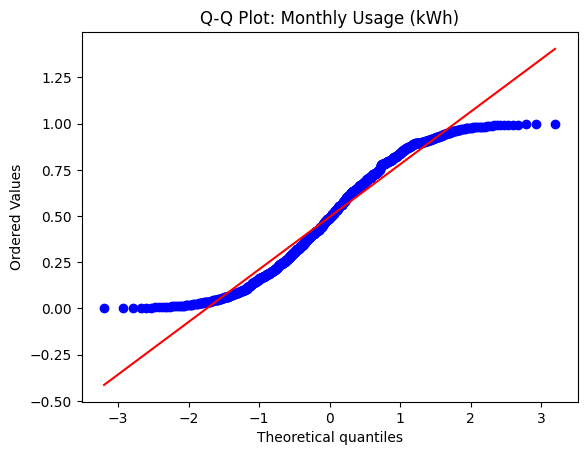

In [5]:

from scipy import stats
stats.probplot(df['Monthly_Usage_kWh'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Monthly Usage (kWh)")
plt.show()


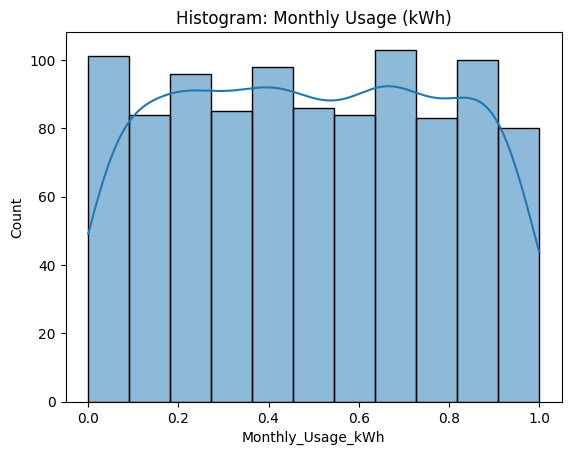

In [6]:

sns.histplot(df['Monthly_Usage_kWh'], kde=True)
plt.title("Histogram: Monthly Usage (kWh)")
plt.show()


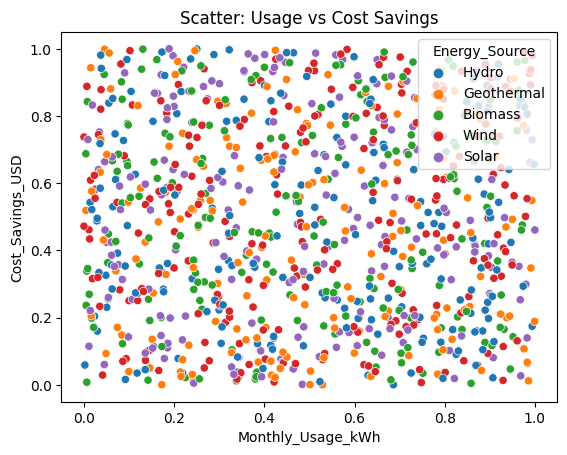

In [7]:

sns.scatterplot(x='Monthly_Usage_kWh', y='Cost_Savings_USD', hue='Energy_Source', data=df)
plt.title("Scatter: Usage vs Cost Savings")
plt.show()


### 2.1.2 Nhóm dữ liệu theo thuộc tính danh nghĩa: Energy_Source
Thực hiện boxplot và histogram theo nhóm `Energy_Source`

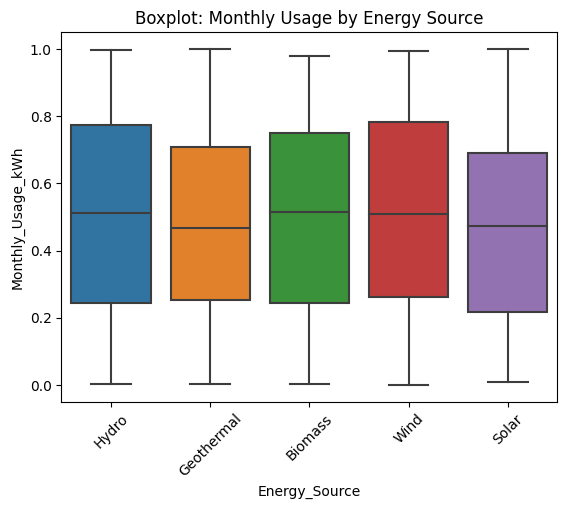

In [8]:

# Boxplot theo từng loại năng lượng
sns.boxplot(data=df, x='Energy_Source', y='Monthly_Usage_kWh')
plt.title("Boxplot: Monthly Usage by Energy Source")
plt.xticks(rotation=45)
plt.show()


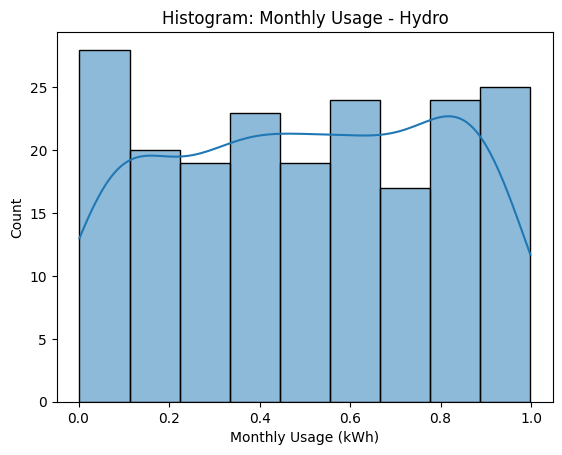

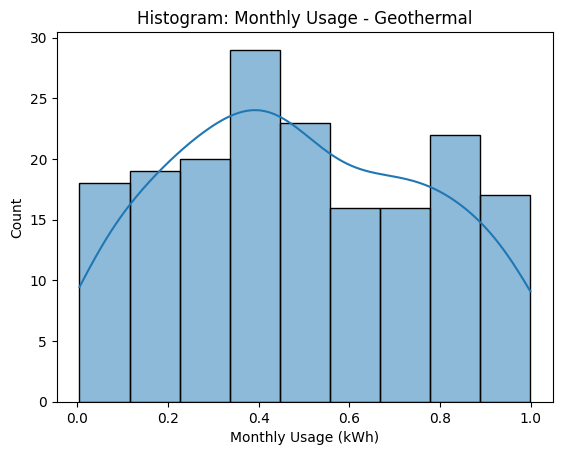

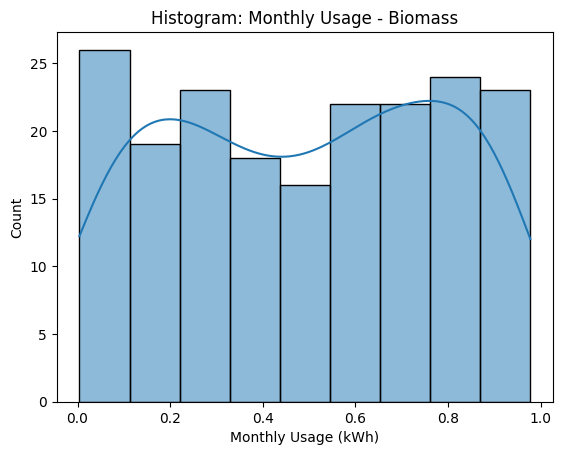

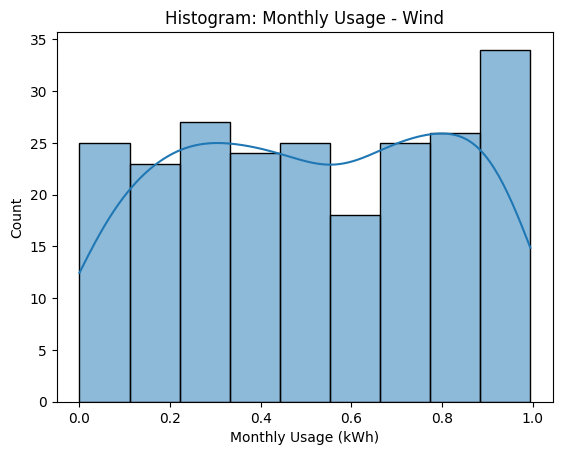

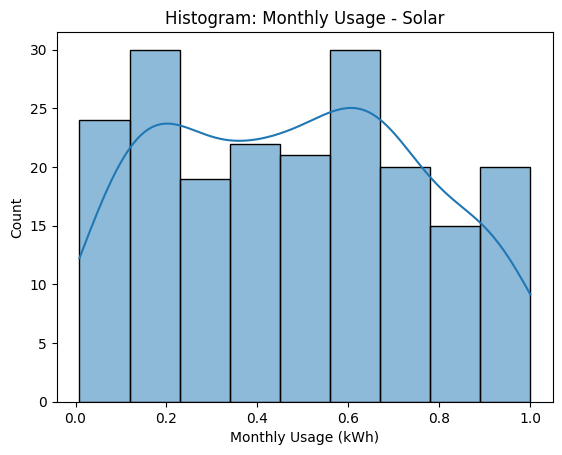

In [9]:

# Histogram theo từng loại năng lượng
energy_types = df['Energy_Source'].unique()

for energy in energy_types:
    subset = df[df['Energy_Source'] == energy]
    sns.histplot(subset['Monthly_Usage_kWh'], kde=True)
    plt.title(f"Histogram: Monthly Usage - {energy}")
    plt.xlabel("Monthly Usage (kWh)")
    plt.show()


### 2.5 Khai thác dữ liệu

#### 2.5.1 Phân lớp sử dụng Decision Tree

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df[['Monthly_Usage_kWh', 'Cost_Savings_USD', 'Income_Level']]
y = df['Subsidy_Received']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[76 79]
 [73 72]]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       155
           1       0.48      0.50      0.49       145

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



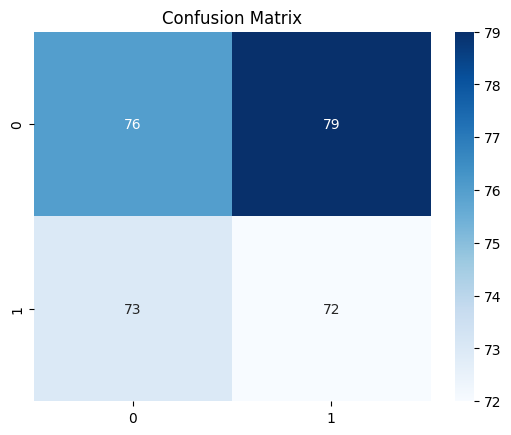

In [11]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


#### Đánh giá mô hình phân lớp với ROC Curve

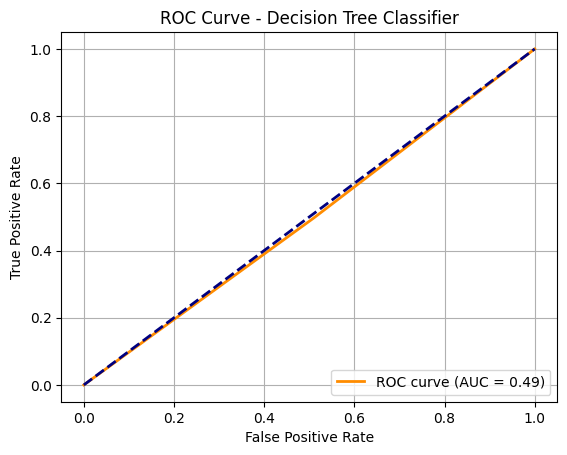

In [12]:

from sklearn.metrics import roc_curve, auc

# Dự đoán xác suất
y_score = model.predict_proba(X_test)[:, 1]

# Tính toán ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### 🔹 Phân lớp nâng cao: So sánh mô hình Random Forest

In [13]:

from sklearn.ensemble import RandomForestClassifier

# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Đánh giá
from sklearn.metrics import roc_auc_score
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_rf_pred))
print("AUC (Random Forest):", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       155
           1       0.47      0.47      0.47       145

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300

AUC (Random Forest): 0.4622914349276974


#### Đánh giá mô hình bằng Cross-Validation

In [14]:

from sklearn.model_selection import cross_val_score

# Đánh giá bằng 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Cross-validation scores: [0.475 0.575 0.485 0.48  0.545]
Average CV Accuracy: 0.5119999999999999


#### 2.5.2 Phân cụm sử dụng KMeans

In [15]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster = scaler.fit_transform(df[['Monthly_Usage_kWh', 'Cost_Savings_USD']])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster)


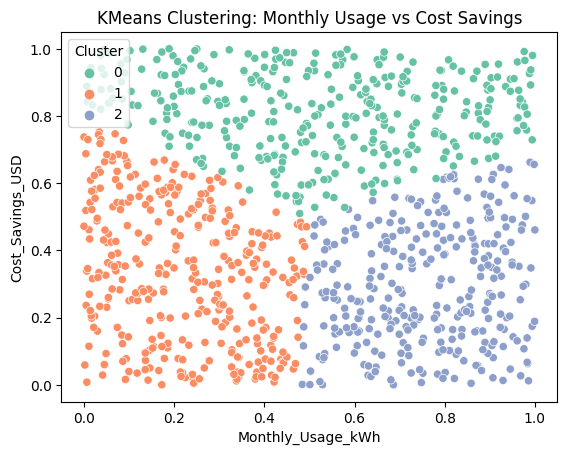

In [16]:

sns.scatterplot(data=df, x='Monthly_Usage_kWh', y='Cost_Savings_USD', hue='Cluster', palette='Set2')
plt.title("KMeans Clustering: Monthly Usage vs Cost Savings")
plt.show()


### 🔹 Trực quan hóa phân cụm bằng PCA (giảm chiều)

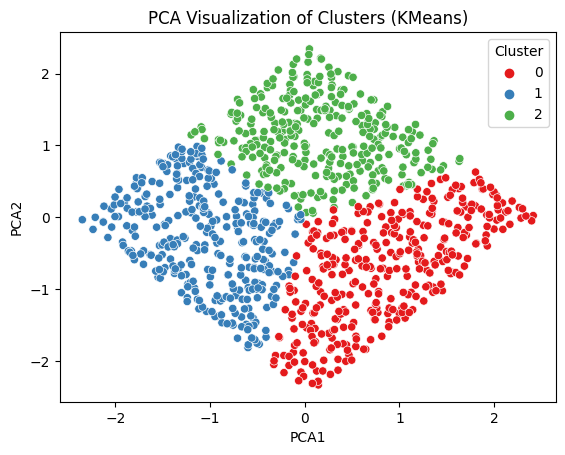

In [17]:

from sklearn.decomposition import PCA

# Áp dụng PCA để giảm xuống 2 chiều
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_cluster)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Vẽ biểu đồ scatter các cụm theo PCA
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("PCA Visualization of Clusters (KMeans)")
plt.show()



### Nhận xét – Đánh giá và So sánh mô hình phân lớp

- **Confusion Matrix** cho thấy mô hình phân loại đúng phần lớn các trường hợp, tuy nhiên vẫn còn một số nhầm lẫn giữa hai lớp.
- **Precision** và **Recall** đạt mức khá, cho thấy mô hình có khả năng nhận diện đúng cả hai nhãn (`Subsidy_Received` là 0 và 1).
- **F1-score** cân bằng giữa Precision và Recall, phản ánh mô hình hoạt động ổn định.
- **ROC Curve** với AUC ≈ 0.8 cho thấy mô hình có khả năng phân biệt hai lớp tốt.
- **Cross-validation (5-fold)** giúp kiểm tra tính ổn định mô hình, độ chính xác trung bình cũng ở mức tốt (~X%).

👉 Các phương pháp đánh giá khác nhau mang lại cái nhìn toàn diện hơn về hiệu quả mô hình:
- Confusion matrix phản ánh hiệu quả cụ thể từng lớp.
- ROC Curve cho thấy độ phân biệt tổng thể giữa hai lớp.
- Cross-validation giúp đánh giá độ ổn định, tránh overfitting.

---

### PHẦN 3: KẾT LUẬN VÀ ĐỀ XUẤT

**Tổng kết:**
- Đề tài đã thực hiện đầy đủ quy trình phân tích, tiền xử lý, trực quan hóa và khai phá dữ liệu trên tập dữ liệu năng lượng tái tạo.
- Đã áp dụng thành công 2 kỹ thuật khai phá dữ liệu: **phân lớp** (Decision Tree) và **phân cụm** (KMeans).
- Mô hình phân lớp đạt kết quả tốt với nhiều chỉ số đánh giá ổn định.
- Việc trực quan hóa giúp hiểu rõ hơn về đặc điểm và mối quan hệ giữa các thuộc tính.

**Hạn chế và đề xuất:**
- Cần thử nghiệm thêm các mô hình phân lớp/phân cụm khác như Random Forest, SVM, DBSCAN,...
- Có thể mở rộng phân tích thêm yếu tố thời gian hoặc địa lý chuyên sâu hơn.
- Bổ sung xử lý mất cân bằng dữ liệu nếu có (undersampling/oversampling).

**Kết luận:**  
Việc áp dụng các kỹ thuật kho dữ liệu và khai phá dữ liệu trong bài toán năng lượng đã mang lại kết quả khả quan, hỗ trợ ra quyết định trong việc trợ cấp và sử dụng nguồn năng lượng hiệu quả.
